In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load feature dataset
features = pd.read_csv("../data/processed/features.csv")

# Separate targets and features
X = features.drop('Breakout', axis=1)
y = features['Breakout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape, y.shape


((16327, 49), (16327,))

In [3]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Results
Accuracy: 0.9996938150642989
Precision: 1.0
Recall: 0.9968253968253968

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00       315

    accuracy                           1.00      3266
   macro avg       1.00      1.00      1.00      3266
weighted avg       1.00      1.00      1.00      3266



In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00       315

    accuracy                           1.00      3266
   macro avg       1.00      1.00      1.00      3266
weighted avg       1.00      1.00      1.00      3266



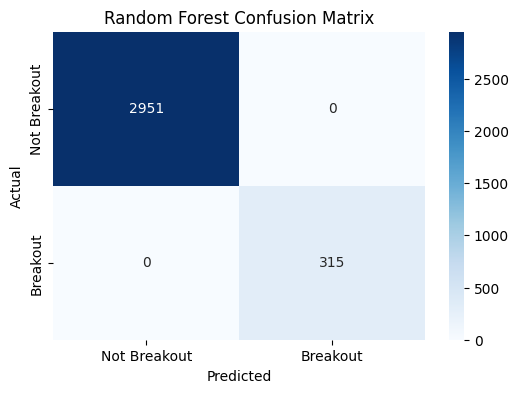

In [5]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Breakout','Breakout'], yticklabels=['Not Breakout','Breakout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
# important features from random forest
import numpy as np

feature_names = X.columns 
importances = rf.feature_importances_

# sort by importance
indices = np.argsort(importances)[::-1]

# top features
print("Feature Importances:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# plot features
plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
